# Imports

In [1]:
import os
import numpy as np
import pandas as pd
from sys import path
from copy import copy, deepcopy
import warnings
warnings.filterwarnings("ignore")

## Directories

In [2]:
model_dir = '../sample_code_submission/'
result_dir = '../sample_result_submission/' 
problem_dir = '../ingestion_program/'  
score_dir = '../scoring_program/'
visualizer_dir = '../visualize/'

### Add directories to path

In [3]:
path.append(model_dir) 
path.append(problem_dir)
path.append(score_dir)
path.append("../")
path.append(visualizer_dir)


**Imports**

In [4]:
# from data_loader import get_settings_from_json
from datagen_temp import DataGenerator
from ingestion import Ingestion
from visualise import *

In [5]:
# Init Ingestion
ingestion = Ingestion()

# Start timer
ingestion.start_timer()


In [6]:


# load test set
ingestion.load_train_set()

# load test set
ingestion.load_test_sets()


[*] Loading Train data
[*] Loading Test data


## Visualise Data 

In [7]:
Train_data_vis = Dataset_visualise(ingestion.train_set["data"],ingestion.train_set["weights"],ingestion.train_set["labels"],"Train Set")

In [8]:
Train_data_vis.examine_dataset()

[*] --- Dataset name : Train Set
[*] --- List of all features


Index(['PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_electron_flag',
       'PRI_muon_flag', 'PRI_had_pt', 'PRI_had_eta', 'PRI_had_phi',
       'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_n_jets', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta',
       'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 'PRI_met', 'PRI_met_phi',
       'DER_mass_transverse_lep_had', 'DER_mass_vis', 'DER_pt_h',
       'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet',
       'DER_deltar_lep_had', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_had', 'DER_mass_transverse_met_lep',
       'DER_deltar_had_lep', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality'],
      dtype='object')

[*] --- Examples of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_electron_flag,PRI_muon_flag,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,...,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_lep_had,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_had,DER_mass_transverse_met_lep,DER_deltar_had_lep,DER_met_phi_centrality,DER_lep_eta_centrality
0,26.9174,-0.336962,2.82574,1,0,68.9667,0.429383,0.482641,68.9667,0.429383,...,69.915304,0.450779,2.46524,92.569322,193.3319,0.390296,8.689553,2.465238,0.280611,0.000006
1,27.2139,0.855456,2.75690,0,1,38.1379,0.375442,-0.423168,38.1379,0.375442,...,-7.000000,-7.000000,3.14003,48.884190,65.3518,0.713566,15.549699,3.140024,1.414209,-7.000000
2,24.3489,2.476770,1.92473,0,1,31.8400,1.733010,-1.064840,31.8400,1.733010,...,-7.000000,-7.000000,3.08071,30.555701,56.1889,0.764727,15.357483,3.080699,-1.410666,-7.000000
3,20.1401,1.416740,-2.18095,0,1,32.9233,1.378990,1.098620,36.2613,2.329400,...,65.143252,3.212219,3.00384,39.762289,122.2480,0.611728,1.946059,3.003853,-0.918496,0.428514
4,22.5110,-0.656847,1.74898,1,0,29.0867,0.425592,-1.734500,29.0867,0.425592,...,-7.000000,-7.000000,3.00167,26.887658,51.5977,0.773928,3.539117,3.001670,1.275853,-7.000000


[*] --- Description of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_electron_flag,PRI_muon_flag,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,...,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_lep_had,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_had,DER_mass_transverse_met_lep,DER_deltar_had_lep,DER_met_phi_centrality,DER_lep_eta_centrality
count,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,...,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000
mean,33.469584,0.000086,-0.005298,0.447875,0.552125,44.446319,0.002594,-0.001091,67.936458,0.004694,...,143.554466,-2.656713,2.588021,53.448922,174.333818,0.870616,20.600697,2.588021,0.493786,-2.599711
std,17.813854,1.189618,1.812457,0.497277,0.497277,23.745375,1.217353,1.815074,59.252785,1.558117,...,271.649683,4.263187,0.712692,37.456426,142.888629,0.547148,20.081133,0.712692,1.117753,3.641902
min,20.000100,-2.499920,-3.141550,0.000000,0.000000,22.917500,-2.673120,-3.141570,22.939800,-4.890660,...,-7.000000,-21.902760,0.582519,0.186226,43.072100,0.045180,-0.000000,0.582525,-1.414214,-7.000000
25%,23.814900,-0.903779,-1.578342,0.000000,0.000000,31.025725,-0.933707,-1.582307,35.457025,-1.124598,...,-7.000000,-7.000000,2.150790,33.166565,69.573925,0.546655,5.822529,2.150788,-0.677091,-7.000000
50%,28.620150,-0.003811,-0.005196,0.000000,1.000000,38.718250,0.012781,0.013084,46.543600,0.012015,...,70.933435,-1.865868,2.843980,45.939171,139.209850,0.751713,14.365393,2.843984,1.125812,0.000001
75%,36.386200,0.903593,1.561020,1.000000,1.000000,49.436175,0.935620,1.566412,73.164450,1.130432,...,178.391716,0.477516,3.107010,62.729732,222.325650,1.034591,29.901931,3.107017,1.380338,0.458880
max,576.872000,2.499990,3.141570,1.000000,1.000000,673.323000,2.666000,3.141550,1083.160000,4.908190,...,5597.728119,19.573016,5.254600,1143.009736,2172.097000,13.694428,379.425528,5.254597,1.414214,1.000000


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

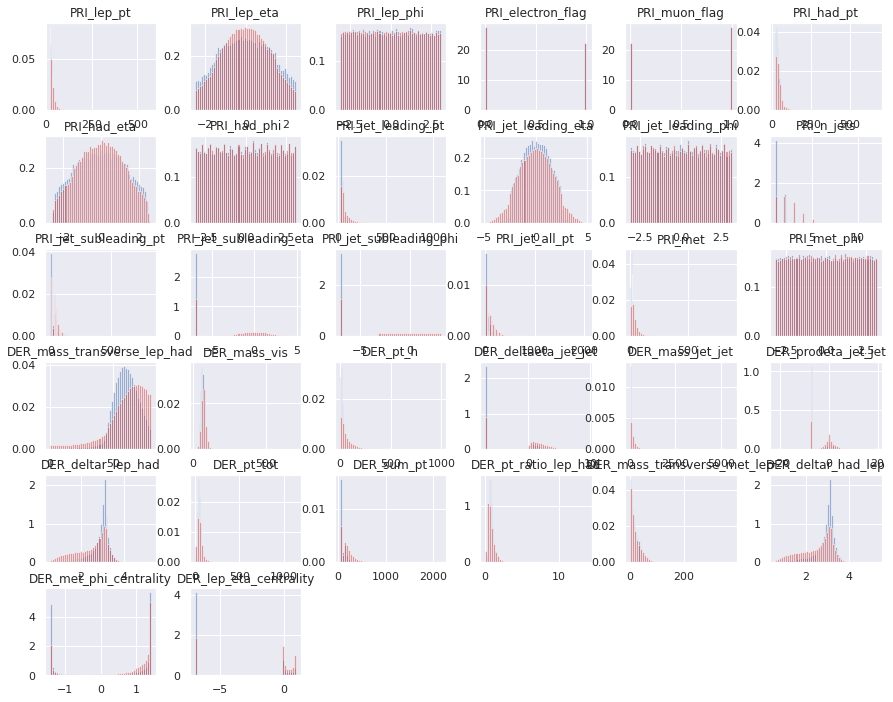

In [9]:
Train_data_vis.histogram_dataset()

Signal feature  correlation matrix


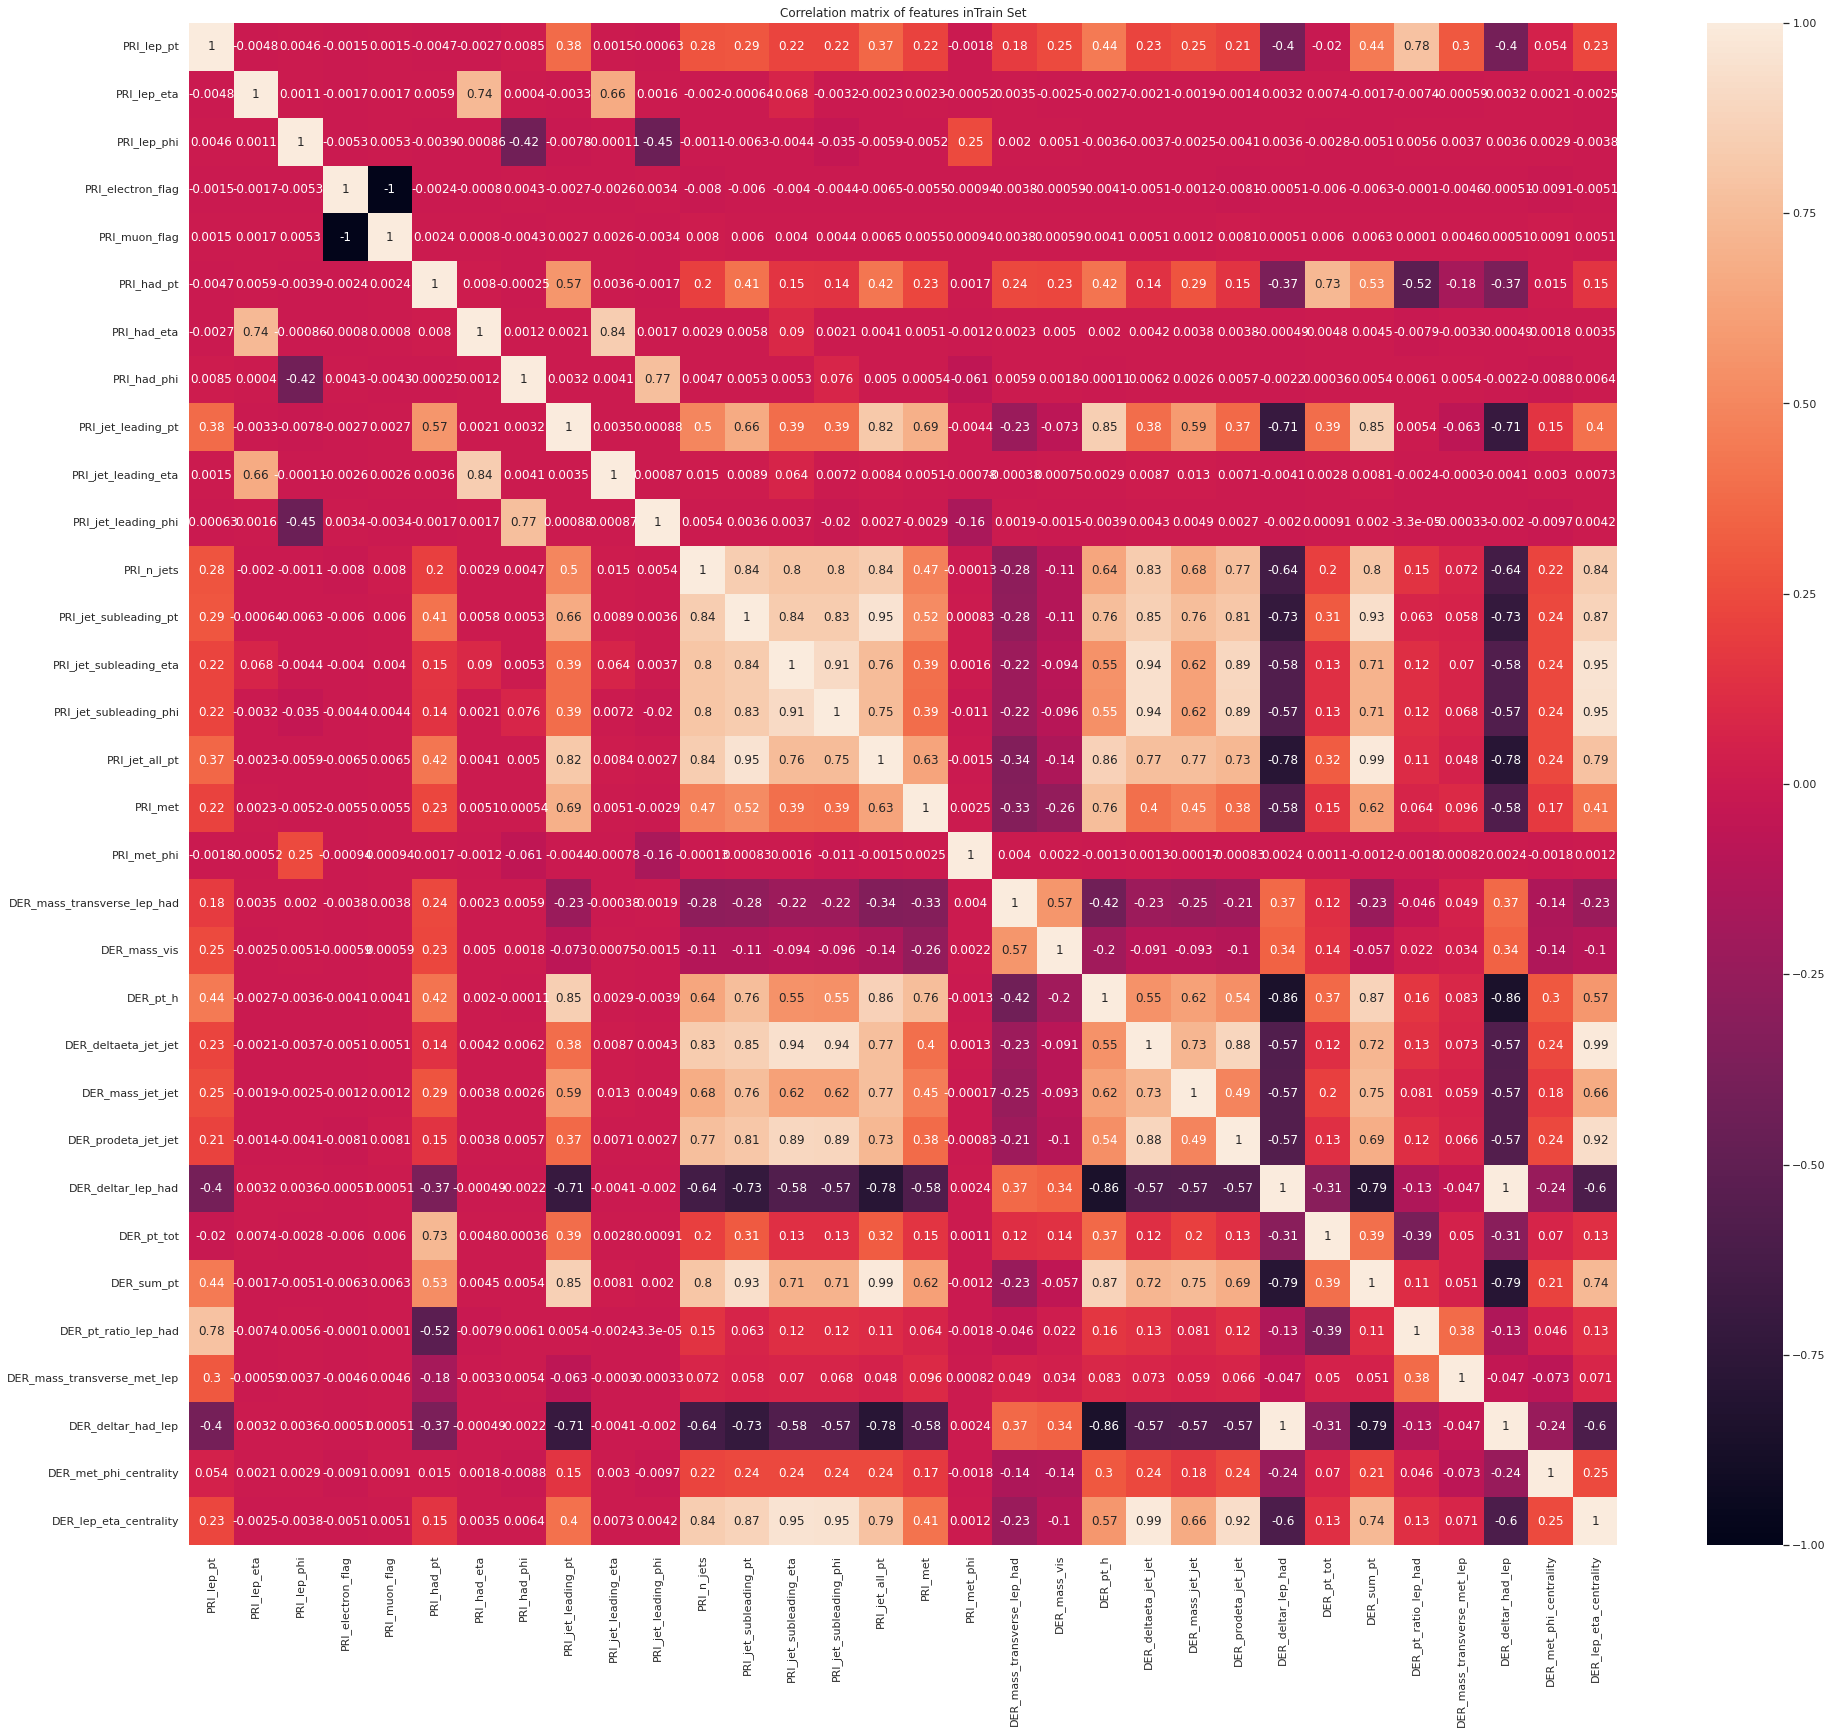

Background feature  correlation matrix


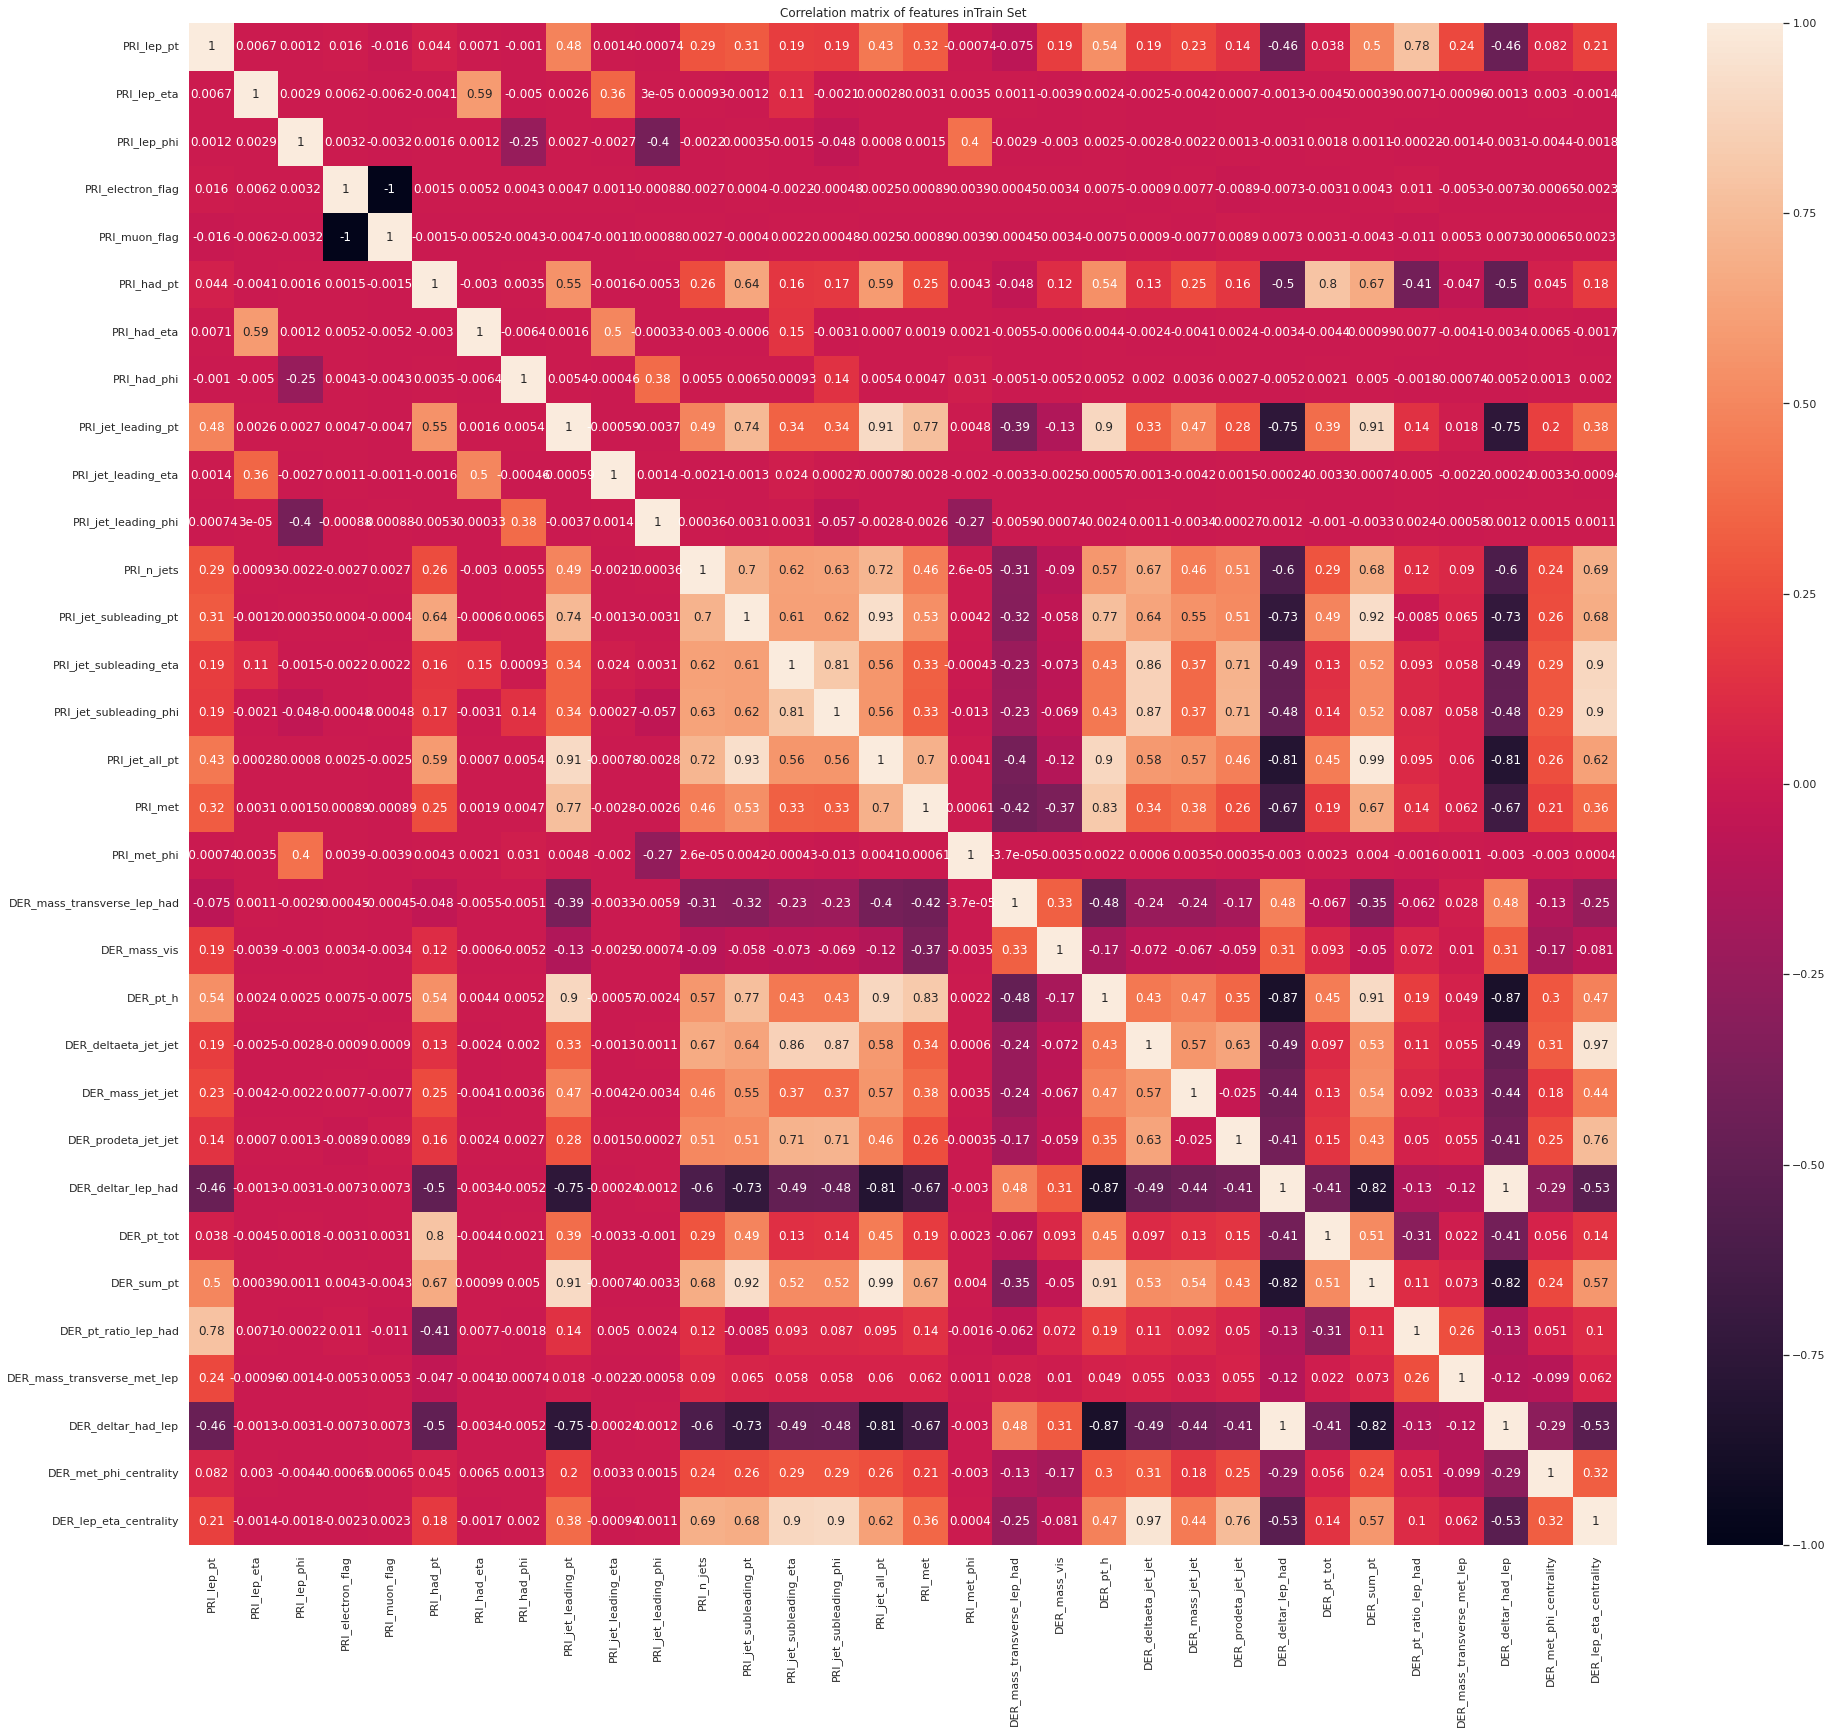

In [10]:
Train_data_vis.correlation_plots()

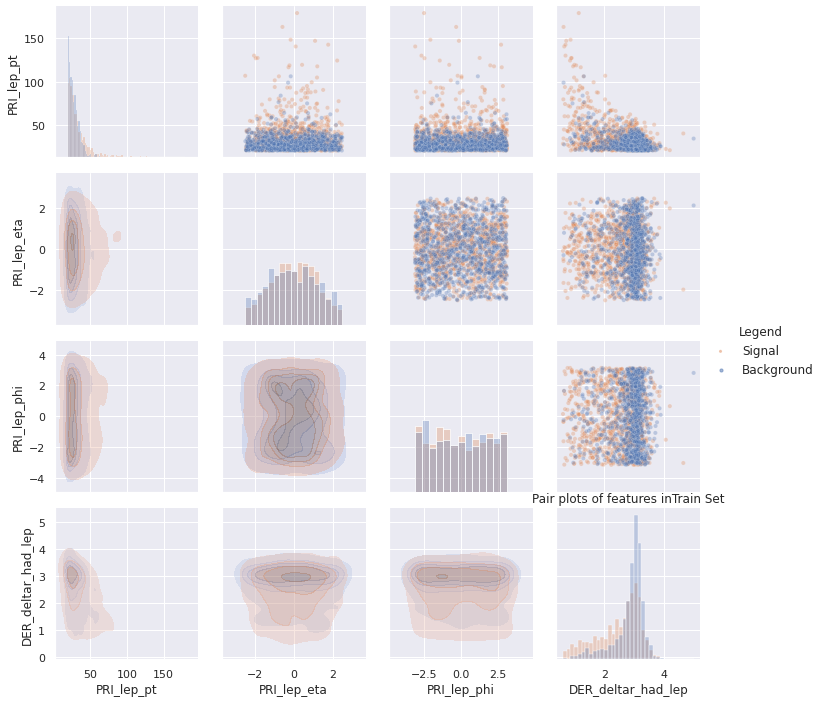

In [11]:
Train_data_vis.pair_plots(columns = ['PRI_lep_pt', 'PRI_lep_eta','PRI_lep_phi', 'DER_deltar_had_lep'])
 

In [12]:
# for i in range(10):
#     Test_data_vis = Dataset_visualise(ingestion.test_sets[i],ingestion.test_sets_weights[i],ingestion.test_labels[i],f"Test Set {i} ")
#     Test_data_vis.examine_dataset()
#     Test_data_vis.histogram_dataset()
#     Test_data_vis.correlation_plots()
#     Test_data_vis.pair_plots()
 

## Training Model

In [13]:
# Initialize submission
ingestion.initialize_submission()

# Call fit method of submission
ingestion.fit_submission()

# Call predict method of submission
ingestion.predict_submission()

model = ingestion.model

[*] Initializing submitted model
[*] Calling fit method of submitted model
[*] - Generating Validation sets
Tau energy rescaling : 0.97
Tau energy rescaling : 0.91
Tau energy rescaling : 0.99
Tau energy rescaling : 0.96
Tau energy rescaling : 0.92
Tau energy rescaling : 0.92
Tau energy rescaling : 1.06
Tau energy rescaling : 1.04
Tau energy rescaling : 0.98
Tau energy rescaling : 1.09
[*] - Intialize BDT
[*] - Train Neural Network
[*] - Intialize BDT
[*] --- Training Model
[*] --- Fitting Model
sum of signal 2860861.8102000006
sum of background 2860861.810200001
[*] --- Predicting Train set
2.3799707e-10
2.3799707e-10
[*] --- AUC train : 0.857520422491219
[*] Choose best theta
8.812484e-10

[*] --- nu_roi: 2870527.862053714 --- beta_roi: 2860861.8102 --- gamma_roi: 9666.051853714005 --- sigma squared: 0.030722993247984363
8.812484e-10

[*] --- nu_roi: 2863645.4399719643 --- beta_roi: 2853983.161027158 --- gamma_roi: 9662.278944807686 --- sigma squared: 0.030673271785529286
8.812484e-10

## Visualise Model

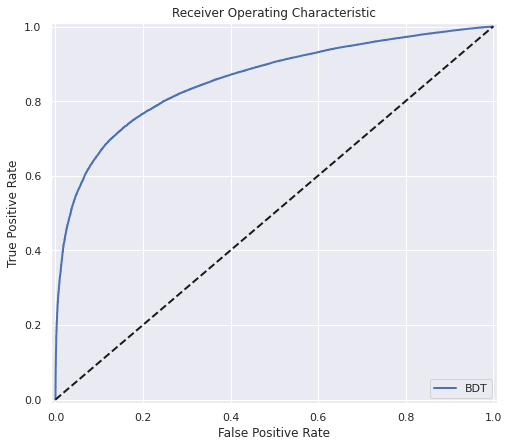

<Figure size 576x504 with 0 Axes>

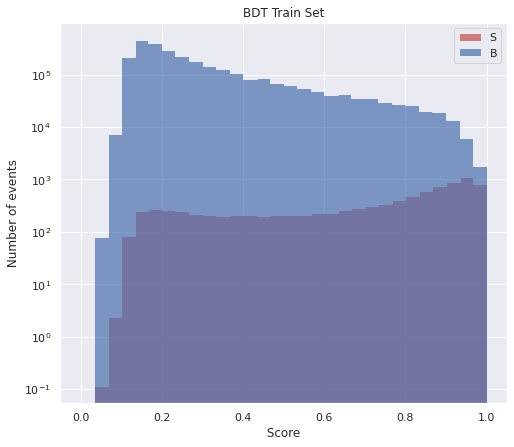

<Figure size 576x504 with 0 Axes>

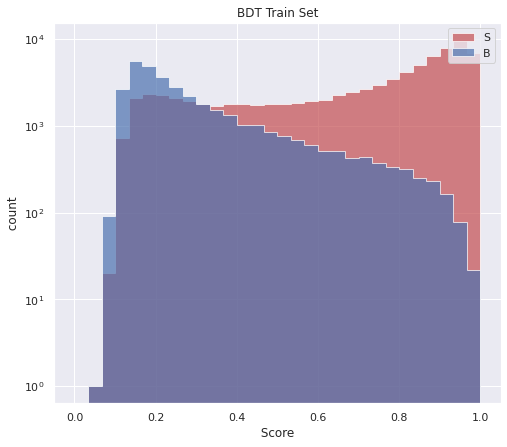

In [14]:
roc_curve_(model.train_set['score'],model.train_set['labels'] ,model.train_set['weights'],plot_label = model.model_name,color='b',lw = 2)

events_histogram(model.train_set['score'],model.train_set['labels'] ,model.train_set['weights'],plot_label = model.model_name + " Train Set")

score_histogram(model.train_set['score'],model.train_set['labels'] ,plot_label = model.model_name + " Train Set")


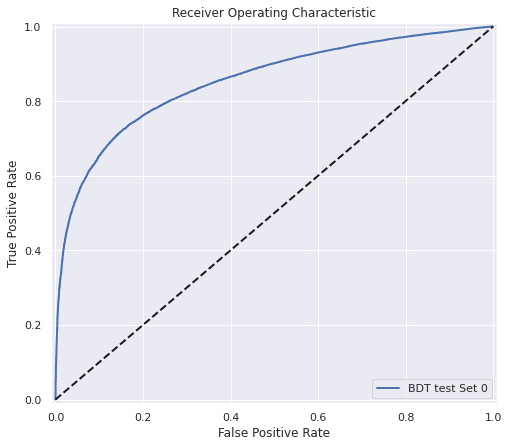

<Figure size 576x504 with 0 Axes>

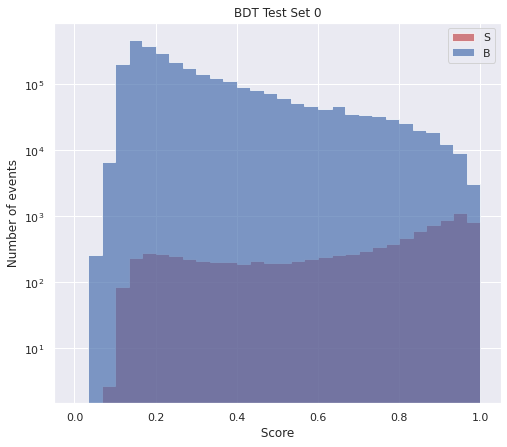

<Figure size 576x504 with 0 Axes>

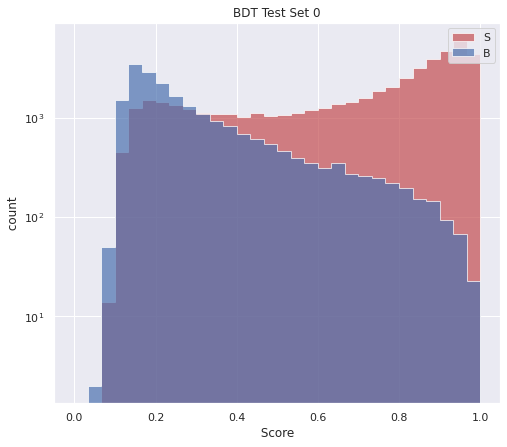

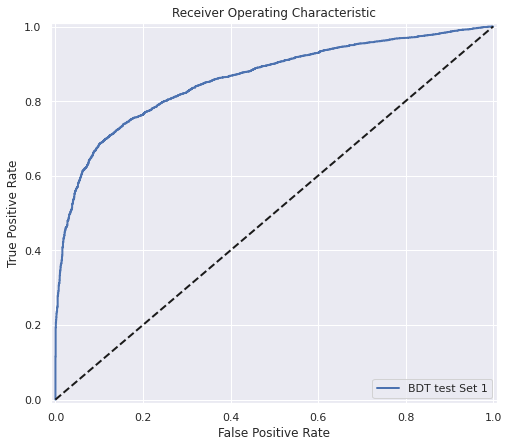

<Figure size 576x504 with 0 Axes>

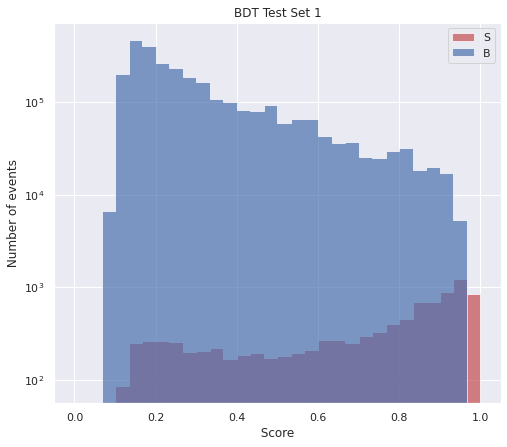

<Figure size 576x504 with 0 Axes>

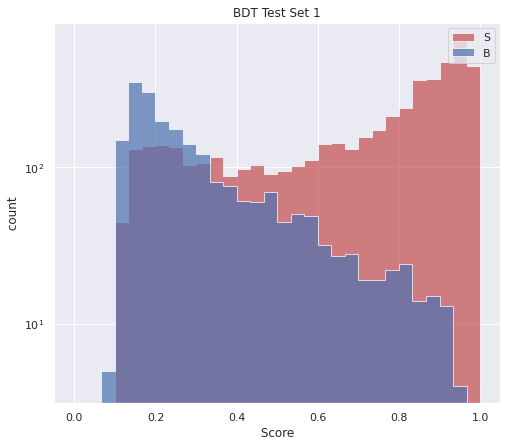

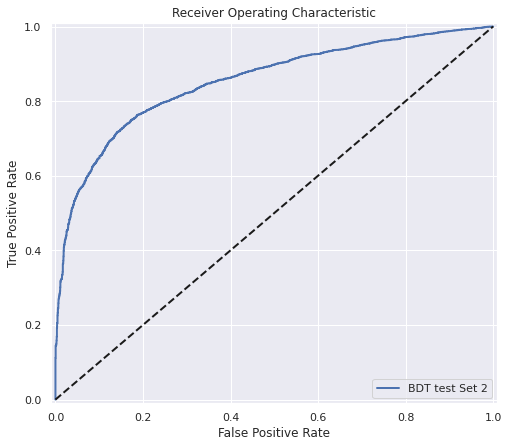

<Figure size 576x504 with 0 Axes>

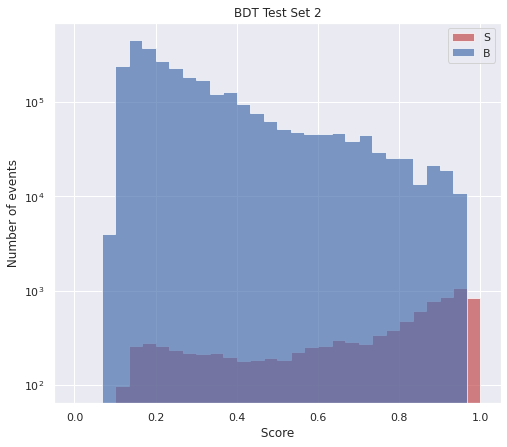

<Figure size 576x504 with 0 Axes>

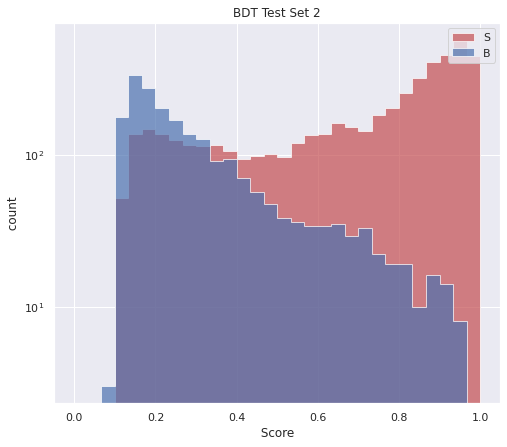

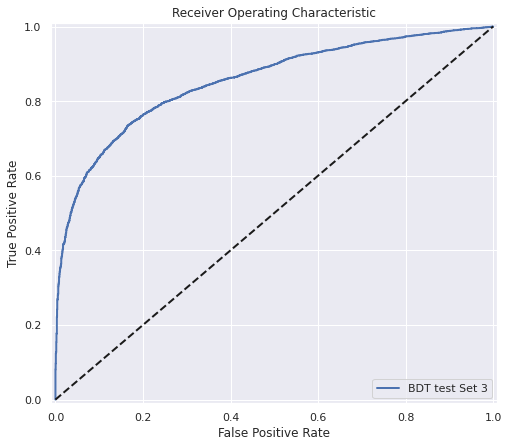

<Figure size 576x504 with 0 Axes>

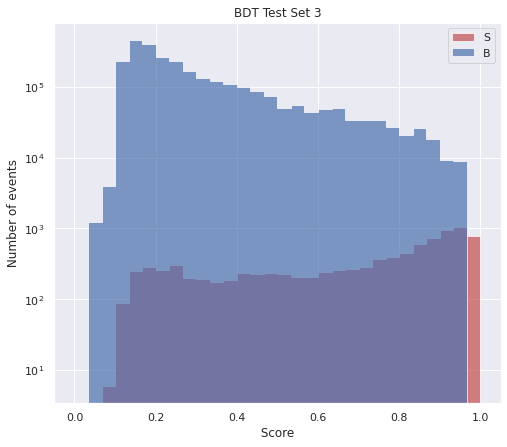

<Figure size 576x504 with 0 Axes>

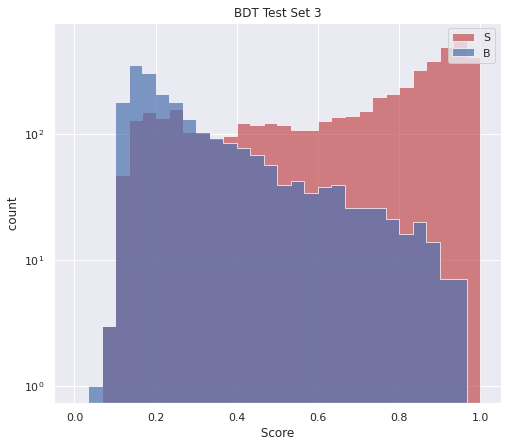

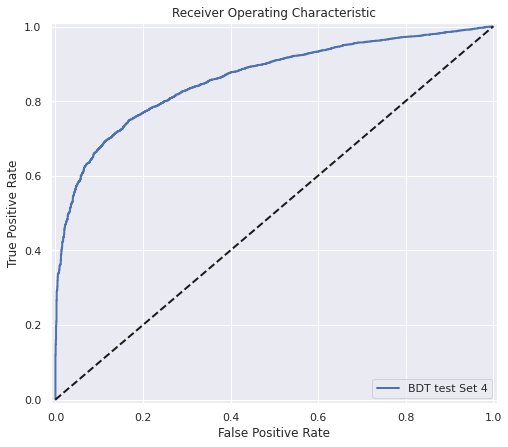

<Figure size 576x504 with 0 Axes>

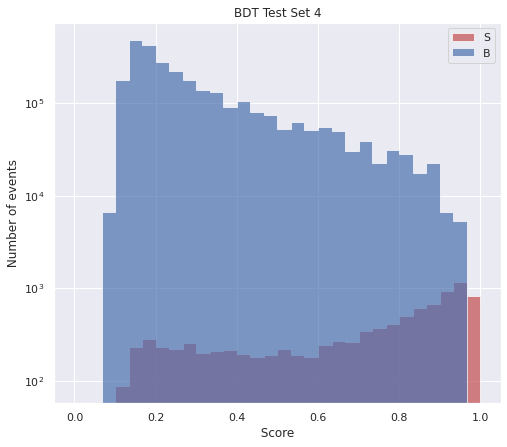

<Figure size 576x504 with 0 Axes>

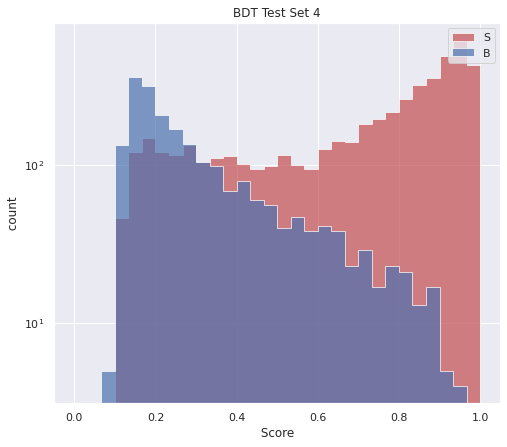

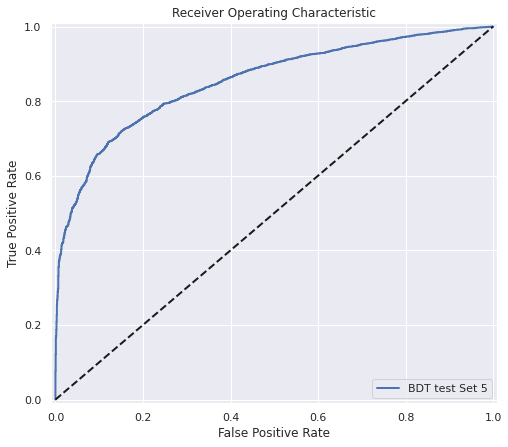

<Figure size 576x504 with 0 Axes>

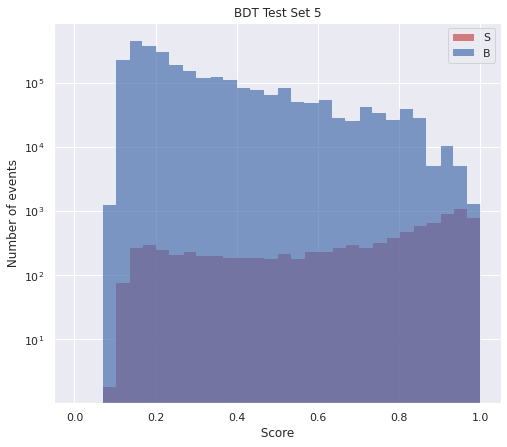

<Figure size 576x504 with 0 Axes>

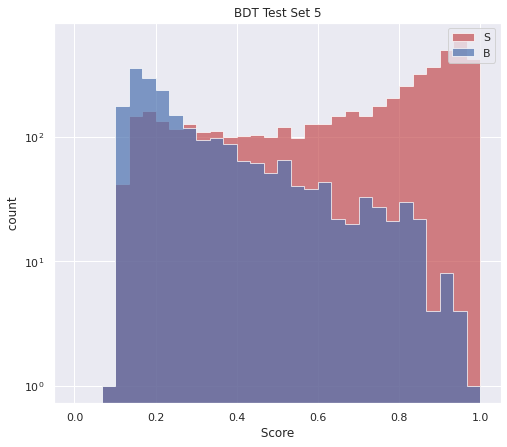

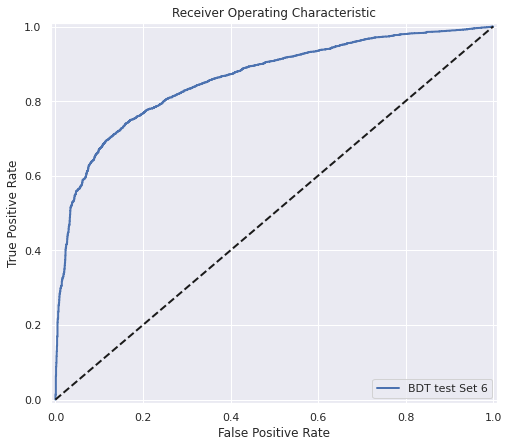

<Figure size 576x504 with 0 Axes>

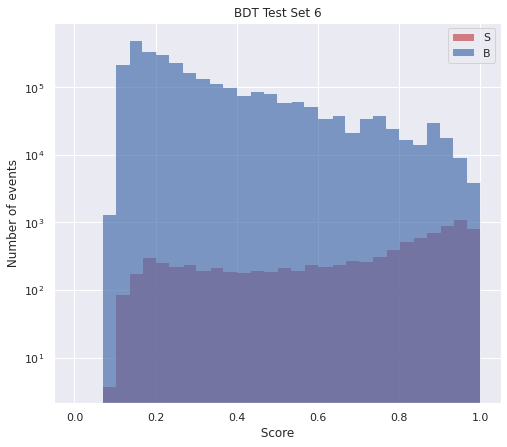

<Figure size 576x504 with 0 Axes>

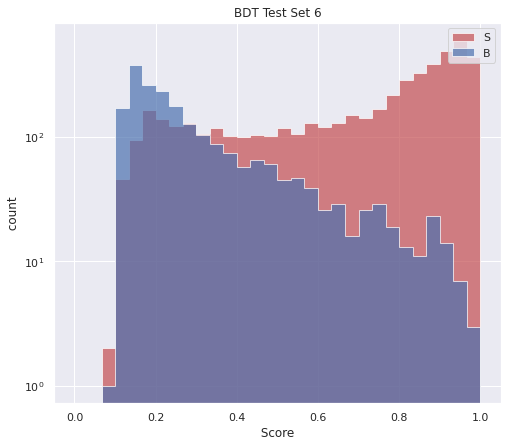

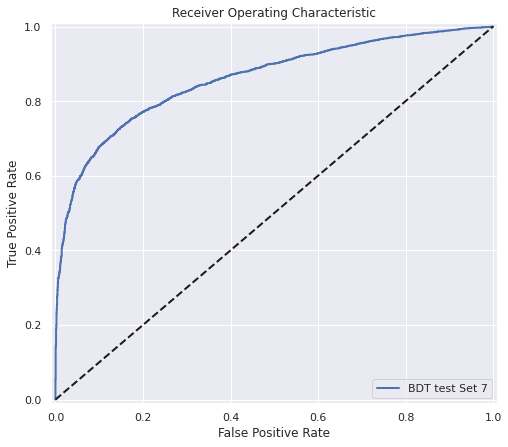

<Figure size 576x504 with 0 Axes>

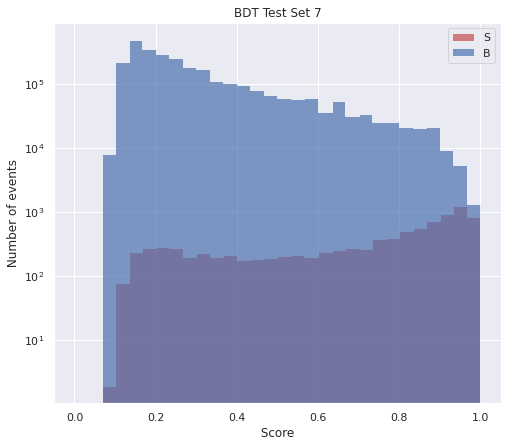

<Figure size 576x504 with 0 Axes>

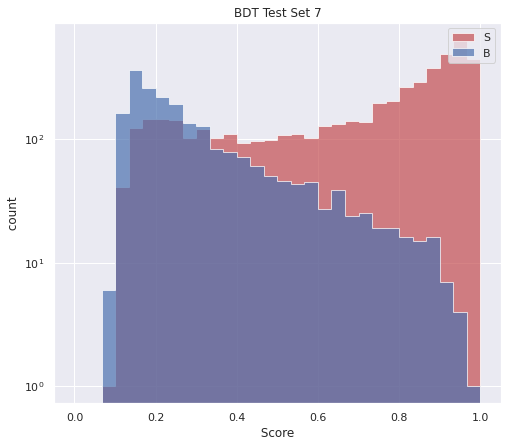

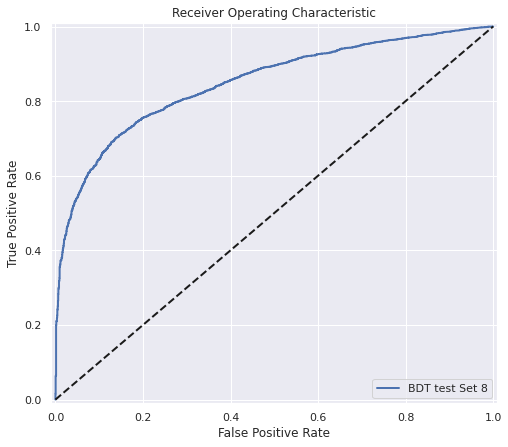

<Figure size 576x504 with 0 Axes>

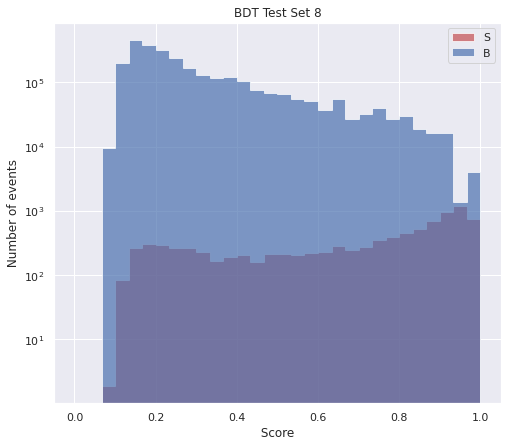

<Figure size 576x504 with 0 Axes>

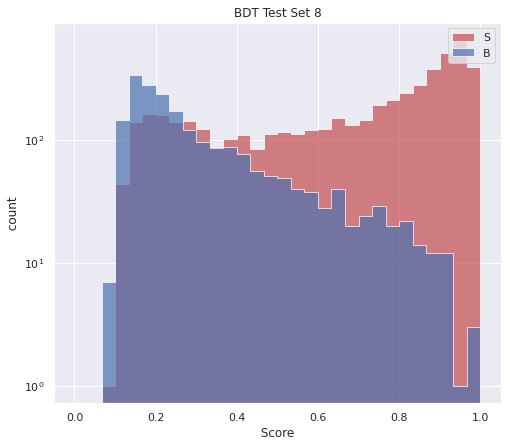

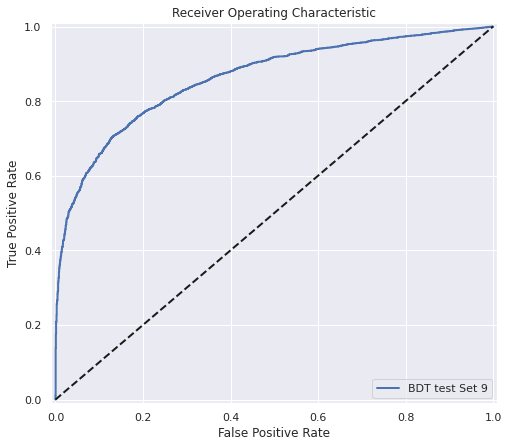

<Figure size 576x504 with 0 Axes>

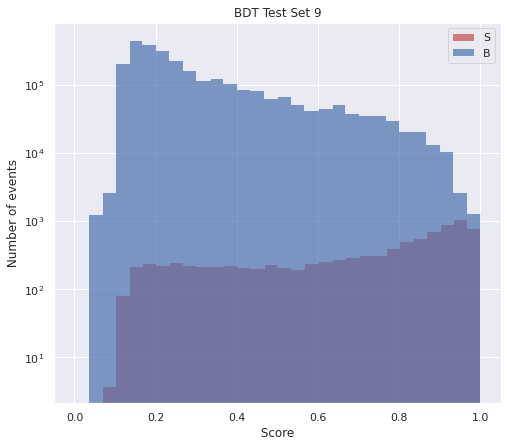

<Figure size 576x504 with 0 Axes>

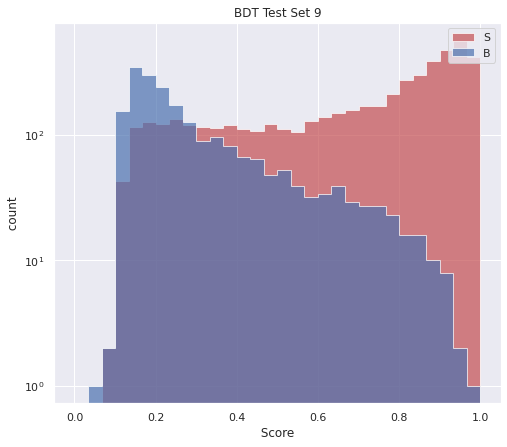

In [17]:
i = 0
for test_set in model.test_sets:
    roc_curve_(test_set['score'],test_set['labels'] ,test_set['weights'],plot_label = model.model_name + f" test Set {i}",color='b',lw = 2)

    events_histogram(test_set['score'],test_set['labels'] ,test_set['weights'],plot_label = model.model_name + f" Test Set {i}")

    score_histogram(test_set['score'],test_set['labels'] ,plot_label = model.model_name + f" Test Set {i}")
    i = i + 1

In [16]:
# Save result
ingestion.save_result()

# Stop timer
ingestion.stop_timer()

# Show duration
ingestion.show_duration()

[*] Saving result
[*] --- delta_mu_hat: 1.0311162644801586
[*] --- mu_hats (avg): 0.7181218580662836

---------------------------------
[✔] Total duration: 0:03:33.137068
---------------------------------


## End